In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()
df = pd.DataFrame(data)
%matplotlib inline

In [4]:
df.count()

age                    1190
sex                    1190
chest pain type        1190
resting bp s           1190
cholesterol            1190
fasting blood sugar    1190
resting ecg            1190
max heart rate         1190
exercise angina        1190
oldpeak                1190
ST slope               1190
target                 1190
dtype: int64

In [5]:
pd.isna(any(df))

False

In [6]:
any(df.duplicated())

True

In [7]:
df = df.drop_duplicates()

In [8]:
any(df.duplicated())

False

In [9]:
df.count()

age                    918
sex                    918
chest pain type        918
resting bp s           918
cholesterol            918
fasting blood sugar    918
resting ecg            918
max heart rate         918
exercise angina        918
oldpeak                918
ST slope               918
target                 918
dtype: int64

In [10]:
# import ydata profiling raport
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

ModuleNotFoundError: No module named 'ydata_profiling'

In [11]:
profile.to_file("output.html")


NameError: name 'profile' is not defined

swaping 0 to None

<Axes: xlabel='cholesterol', ylabel='Count'>

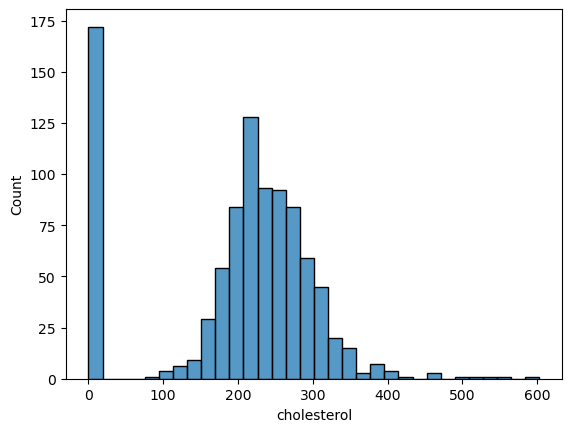

In [12]:
sns.histplot(df, x = "cholesterol")

In [13]:
df['cholesterol'] = df["cholesterol"].apply(lambda x: x if x != 0 else None)

<Axes: xlabel='cholesterol', ylabel='Count'>

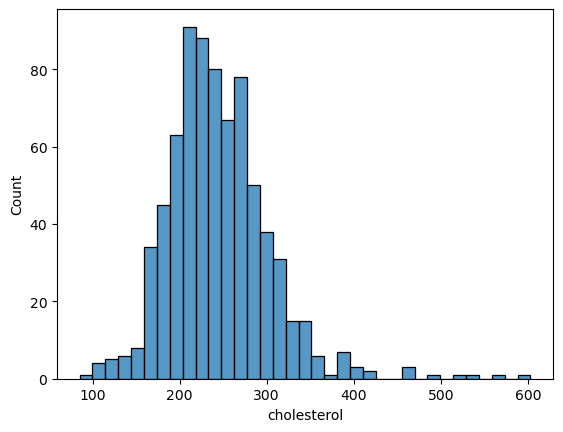

In [14]:
sns.histplot(df, x = "cholesterol")

<Axes: >

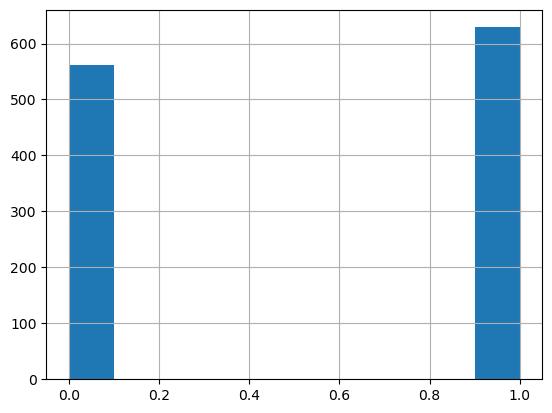

In [15]:
data["target"].hist()

In [16]:
df.dropna(inplace=True)

target = df['target']
features = df.drop('target', axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0xc00ff3)

[Text(0.5, 1.0, 'Corelation between features')]

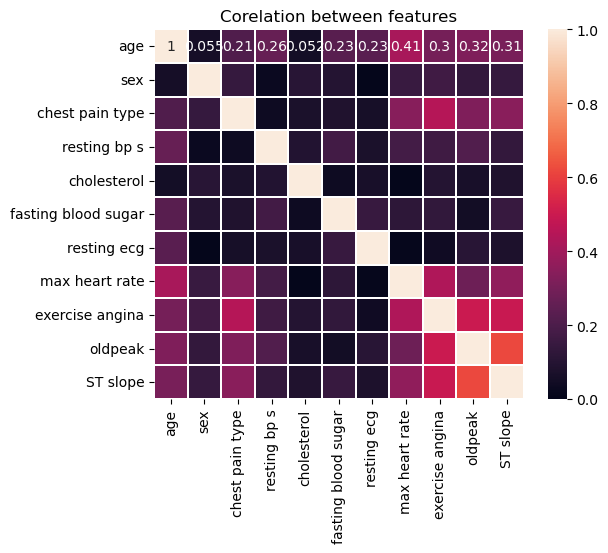

In [36]:
corr = X_train.corr()
# cmap = sns.diverging_palette(center="dark", as_cmap = True)
sns.heatmap(abs(corr), vmax=1, vmin=0, square=True, linewidths=0.2, annot=True).set(title="Corelation between features")

In [125]:
categorical_columns = ["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope"]
real_columns = [f for f in X_train.columns if f not in categorical_columns if f not in ("oldpeak",)]

categorical_features = X_train[categorical_columns]
real_features = X_train[real_columns]

In [127]:
real_features

age  resting bp s  cholesterol  max heart rate
140    52           160        331.0              94
688    57           120        354.0             163
182    51           130        224.0             150
875    64           140        335.0             158
770    64           130        303.0             122
...   ...           ...          ...             ...
796    50           129        196.0             163
587    53           124        243.0             122
70     57           140        265.0             145
202    46           120        230.0             150
1178   55           132        342.0             166

[596 rows x 4 columns]

In [37]:
categorical_features

sex  chest pain type  fasting blood sugar  resting ecg  exercise angina  \
140     1                4                    0            0                1   
688     0                4                    0            0                1   
182     1                2                    0            0                0   
875     1                3                    0            0                0   
770     0                4                    0            0                0   
...   ...              ...                  ...          ...              ...   
796     1                3                    0            0                0   
587     1                4                    0            0                1   
70      1                2                    0            1                1   
202     1                3                    0            0                0   
1178    0                2                    0            0                0   

      ST slope  
140          2  
688          1  
182          1  
875          1  
770          2  
...        ...  
796          1  
587          2  
70           2  
202          1  
1178         1  

[596 rows x 6 columns]

In [39]:
len(categorical_columns) + len(real_columns)

10

In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

# pd.isna(real_features).sum()

gaussian_nb = GaussianNB()
gaussian_nb.fit(real_features, y_train)

categorical_nb = CategoricalNB()
# multinomial_nb = GaussianNB()

categorical_nb.fit(categorical_features, y_train)

CategoricalNB()

In [129]:
def nb_predict(X):
    y_predicted_real = gaussian_nb.predict_proba(X_test[real_columns])
    y_predicted_categorical = categorical_nb.predict_proba(X_test[categorical_columns])
    
    probability_y_1 = y_train.sum() / y_train.count()
    probability_y_0 = 1 - probability_y_1
    
    posterior = y_predicted_real * y_predicted_categorical / [probability_y_0,probability_y_1]
    return np.argmax(posterior, axis=1)


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_computed = nb_predict(X_test)
accuracy_score(y_test,y_computed)

0.84

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_computed = nb_predict(X_test)
cf_matrix = confusion_matrix(y_test,y_computed)
accuracy_score(y_test,y_computed)

<Axes: >

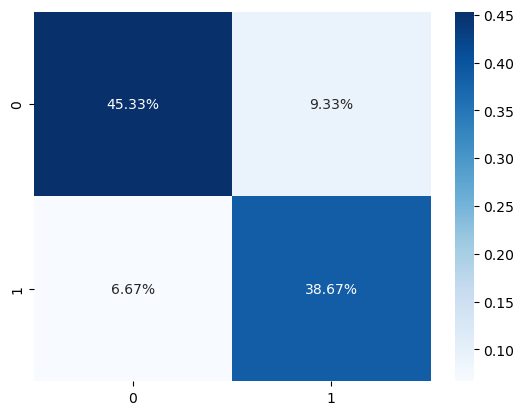

In [131]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap="Blues", fmt=".2%")